In [16]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import os

In [2]:
# read data file in tsv
df = pd.read_table('/Users/williamnehemia/Documents/Information Retrieval/train.tsv')

In [3]:
# print 5 first row
print(df.head())

                                                text  label    dataset  \
0  The commemoration was revealed on Whit Monday,...      1  wikipedia   
1  Pei's structure set the inflexible shoebox at ...      1  wikipedia   
2  The North Pacific right whale seems to happen ...      1  wikipedia   
3  There has been a settlement at Bramhall since ...      1  wikipedia   
4  After the arrival of the collection, the melod...      1  wikipedia   

    method  
0  spinbot  
1  spinbot  
2  spinbot  
3  spinbot  
4  spinbot  


In [4]:
# drop other column except the text
df = df.drop(columns=['label', 'dataset', 'method'])

In [5]:
# print 5 first row
print(df.head())

                                                text
0  The commemoration was revealed on Whit Monday,...
1  Pei's structure set the inflexible shoebox at ...
2  The North Pacific right whale seems to happen ...
3  There has been a settlement at Bramhall since ...
4  After the arrival of the collection, the melod...


In [6]:
# method for calculate number of words
def count_num_of_words(text):
    return len(text.split())

In [7]:
# make new column the number of words in text
df['num_of_words'] = df['text'].apply(count_num_of_words)

In [8]:
# print 5 first row
print(df.head())

                                                text  num_of_words
0  The commemoration was revealed on Whit Monday,...           163
1  Pei's structure set the inflexible shoebox at ...           182
2  The North Pacific right whale seems to happen ...           185
3  There has been a settlement at Bramhall since ...           271
4  After the arrival of the collection, the melod...           180


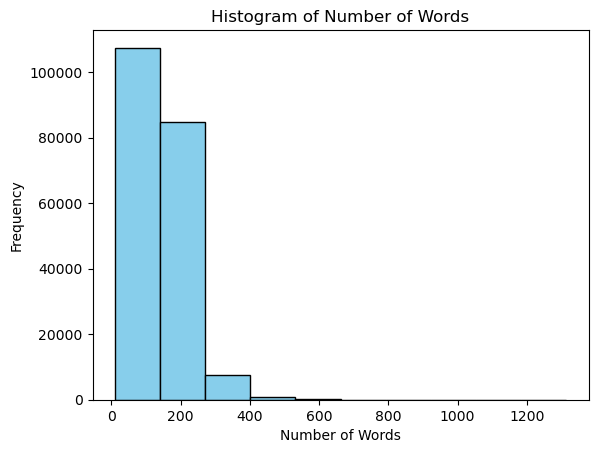

In [9]:
# generate histogram to see number of words
plt.hist(df['num_of_words'], color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words')
plt.show()

In [11]:
print(df.describe())

        num_of_words
count  200767.000000
mean      149.546345
std        61.970328
min        11.000000
25%       107.000000
50%       137.000000
75%       177.000000
max      1313.000000


In [12]:
# drop document that have words less than 200 or more than 300
df = df[(df['num_of_words'] >= 200) & (df['num_of_words'] <= 300)]

In [13]:
# print number of rows
print(df.shape[0])

28223


In [16]:
# generate txt document
idx = 1
dir_path = '/Users/williamnehemia/Documents/Information Retrieval/document_ranking_IR/Document/'
for index, row in df.iterrows():
    with open(dir_path + 'document_' + str(idx) + '.txt', 'w') as file:
        file.write(row['text'])
    idx += 1

In [ ]:
# # method for checking latin characters
# def has_non_latin_characters(text):
#     latin_characters = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
#     for char in text:
#         if char not in latin_characters and not char.isspace():
#             return True
#     return False

In [ ]:
# # calculate document that have non latin characters
# non_latin = 0
# latin = 0
# for index, row in df.iterrows():
#     check = has_non_latin_characters(row['text'])
#     if check:
        

In [19]:
# only use 1000 document, copy file to another directory
files = os.listdir('/Users/williamnehemia/Documents/Information Retrieval/document_ranking_IR/Document')
idx = 1
for file in files:
    if idx <= 100:
        source = '/Users/williamnehemia/Documents/Information Retrieval/document_ranking_IR/Document/' + file
        destination = '/Users/williamnehemia/Documents/Information Retrieval/document_ranking_IR/Document4/' + file
        shutil.copy(source, destination)
        idx += 1